# ROUND 2

## Show the dataframe shape.

In [108]:
import pandas as pd

marketing_customer_data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
marketing_customer_data.shape

(10910, 26)

## Standardize header names.

In [109]:
print(list(marketing_customer_data.columns))
columns_definition = { 'EmploymentStatus':'Employment Status' }
marketing_customer_data = marketing_customer_data.rename(columns = columns_definition)
print(list(marketing_customer_data.columns))

['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size', 'Vehicle Type']
['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'Employment Status', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size', 'Vehicle Type']


## Which columns are numerical?

In [110]:
numerical_columns = marketing_customer_data._get_numeric_data().columns
list(numerical_columns)

['Unnamed: 0',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

## Which columns are categorical?

In [111]:
list(set(marketing_customer_data.columns) - set(numerical_columns))

['Coverage',
 'Location Code',
 'Policy',
 'Gender',
 'Vehicle Class',
 'Customer',
 'Response',
 'Renew Offer Type',
 'Employment Status',
 'Vehicle Type',
 'Sales Channel',
 'Effective To Date',
 'Vehicle Size',
 'Marital Status',
 'Education',
 'Policy Type',
 'State']

## Check and deal with NaN values.

In [112]:
marketing_customer_data.isna().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
Employment Status                   0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [113]:
marketing_customer_data.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
Employment Status                 object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [114]:
month_since_last_claim_median = marketing_customer_data['Months Since Last Claim'].mean()
marketing_customer_data['Months Since Last Claim'] = marketing_customer_data['Months Since Last Claim'].fillna(month_since_last_claim_median)
number_open_complaints_median = marketing_customer_data['Number of Open Complaints'].mean()
marketing_customer_data['Number of Open Complaints'] = marketing_customer_data['Number of Open Complaints'].fillna(number_open_complaints_median)
marketing_customer_data.isna().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
Employment Status                   0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints           0
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [115]:
description = marketing_customer_data.describe(include='all').T['50%']['Income']

In [116]:
#marketing_customer_data.describe()['Number of Open Complaints']
#state_more_occurrences = marketing_customer_data['State'].value_counts(dropna=False)[0]
marketing_customer_data['State'] = marketing_customer_data['State'].fillna('California')

In [117]:
#response_more_occurences = marketing_customer_data['Response'].value_counts(dropna=False)[0]
marketing_customer_data['Response'] = marketing_customer_data['Response'].fillna("No")

In [118]:
#class_more_occurences = marketing_customer_data['Vehicle Class'].value_counts(dropna=False)[0]
marketing_customer_data['Vehicle Class'] = marketing_customer_data['Vehicle Class'].fillna("Four-Door Car")

In [119]:
#size_more_occurrences = marketing_customer_data['Vehicle Size'].value_counts(dropna=False)[0]
marketing_customer_data['Vehicle Size'] = marketing_customer_data['Vehicle Size'].fillna("Medsize")

In [120]:
#type_more_occurrences = marketing_customer_data['Vehicle Type'].value_counts(dropna=False)[0]
marketing_customer_data['Vehicle Type'] = marketing_customer_data['Vehicle Type'].fillna("M")

In [121]:
marketing_customer_data.isna().sum()

Unnamed: 0                       0
Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
Employment Status                0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Vehicle Type                     0
dtype: int64

## Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [122]:
#file['date_time'] = pd.to_datetime(file['date_time'], errors='coerce')
marketing_customer_data['Effective To Date'] = pd.to_datetime(marketing_customer_data['Effective To Date'], errors='coerce')
marketing_customer_data['Month'] = pd.DatetimeIndex(marketing_customer_data['Effective To Date']).month

In [123]:
marketing_customer_data[marketing_customer_data['Month'].isin([1, 2, 3])]

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


## BONUS: Put all the previously mentioned data transformations into a function.

In [124]:
marketing_customer_data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

def standardize_header():
    marketing_customer_data.drop('Unnamed: 0', inplace=True, axis=1)
    marketing_customer_data.columns = marketing_customer_data.columns.str.lower().str.replace(' ', '_')
    
def add_month_column():
    marketing_customer_data['effective_to_date'] = pd.to_datetime(marketing_customer_data['effective_to_date'], errors='coerce')
    marketing_customer_data['month'] = pd.DatetimeIndex(marketing_customer_data['effective_to_date']).month

def fill_nan_with_mean(columns):
    for col in columns:
        mean = marketing_customer_data[col].mean()
        marketing_customer_data[col] = marketing_customer_data[col].fillna(mean)

def fill_nan_with_mode(columns):
    for col in columns:
        mode = marketing_customer_data[col].mode()[0]
        marketing_customer_data[col] = marketing_customer_data[col].fillna(mode)

def transform_data():
    standardize_header()
    fill_nan_with_mean(['months_since_last_claim', 'number_of_open_complaints'])
    fill_nan_with_mode(['state', 'response', 'vehicle_class', 'vehicle_size', 'vehicle_type'])
    add_month_column()
    return marketing_customer_data[marketing_customer_data['month'].isin([1, 2, 3])]
    
marketing_customer_data = transform_data()
marketing_customer_data.shape

(10910, 26)

# ROUND 3

## Show DataFrame info.

In [125]:
marketing_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

## Describe DataFrame.

In [126]:
marketing_customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10910.0,15.149071,9.783520,0.000000,7.000000,15.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10910.0,0.384256,0.885589,0.000000,0.000000,0.000000,0.384256,5.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


## Show a plot of the total number of responses.

<AxesSubplot:>

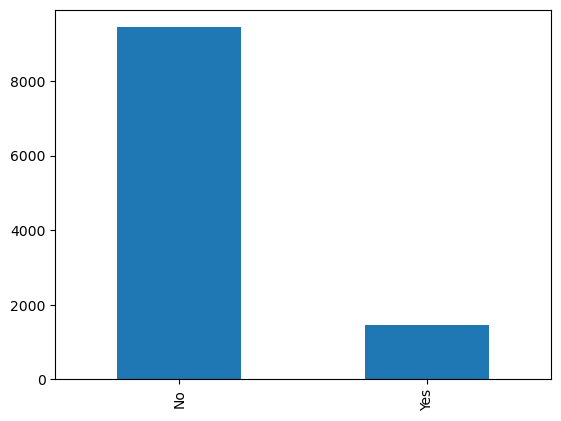

In [127]:
marketing_customer_data['response'].value_counts()[:].plot(kind='bar')

## Show a plot of the response rate by the sales channel.

In [129]:
marketing_customer_data['response'].value_counts()

No     9444
Yes    1466
Name: response, dtype: int64

In [130]:
marketing_customer_data['sales_channel'].value_counts()

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: sales_channel, dtype: int64

In [131]:
list(marketing_customer_data['response'].unique())

['No', 'Yes']

In [132]:
sales_channels = list(marketing_customer_data['sales_channel'].unique())
sales_channels

['Agent', 'Call Center', 'Branch', 'Web']

In [133]:
marketing_customer_data['responded'] = marketing_customer_data['response'].isin(['Yes', 8813])
marketing_customer_data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,responded
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2,False
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1,False
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,False
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,True
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,False
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,False
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2,False
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,False


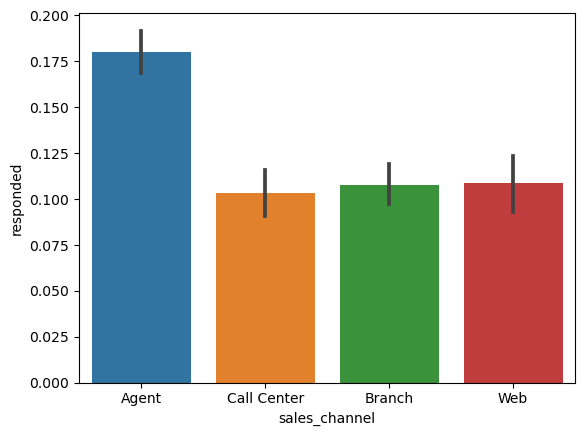

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="sales_channel", y="responded", data=marketing_customer_data)
plt.show()

## Show a plot of the response rate by the total claim amount.

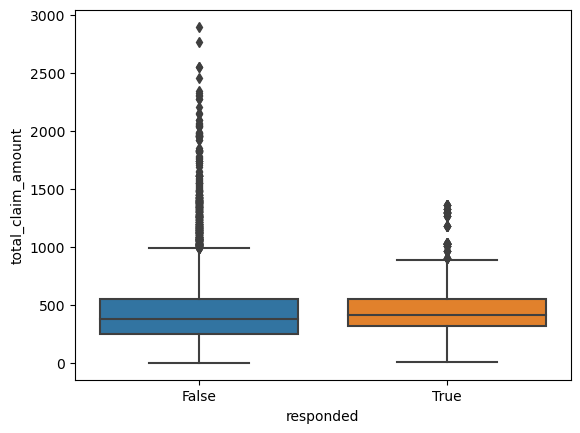

In [136]:
sns.boxplot(x = 'responded',y='total_claim_amount', data=marketing_customer_data)
plt.show()

## Show a plot of the response rate by income.

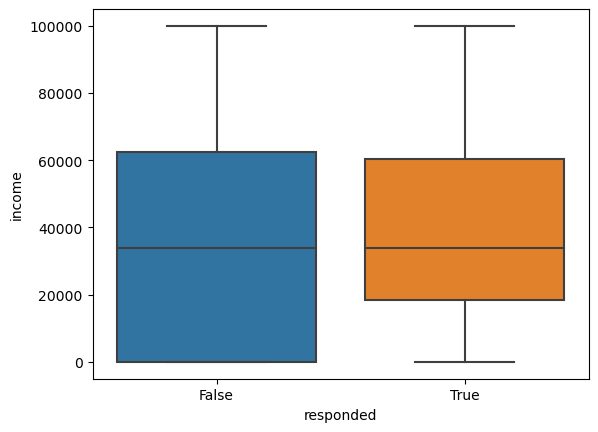

In [137]:
sns.boxplot(x = 'responded',y='income', data=marketing_customer_data)
plt.show()

# Round 4

## Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [139]:
import numpy as np

marketing_customer_data["responded"] = marketing_customer_data["responded"].astype(int)

numerical = marketing_customer_data.select_dtypes(np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,responded
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,0
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,0
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,0
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,0
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,0
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,0
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,0


In [140]:
categorical = marketing_customer_data.select_dtypes(object)
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


## Now we will try to check the normality of the numerical variables visually

## Use seaborn library to construct distribution plots for the numerical variables

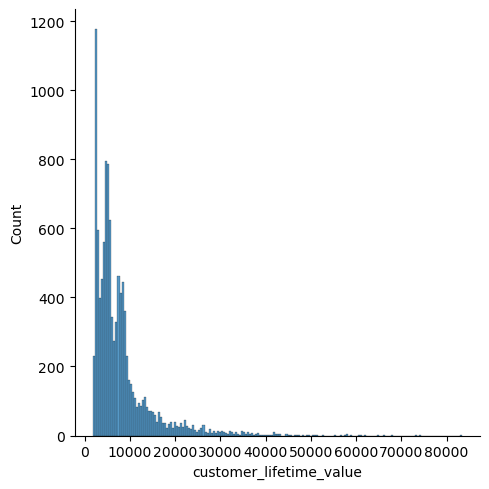

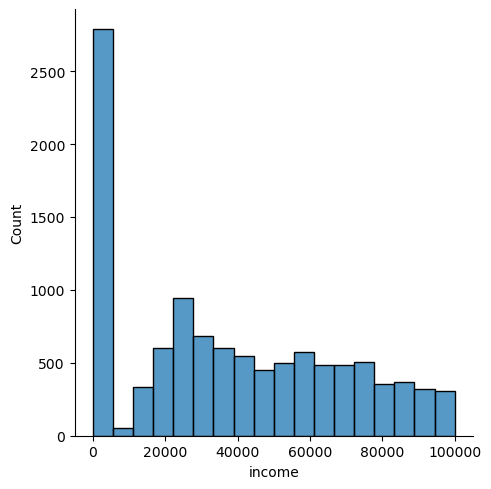

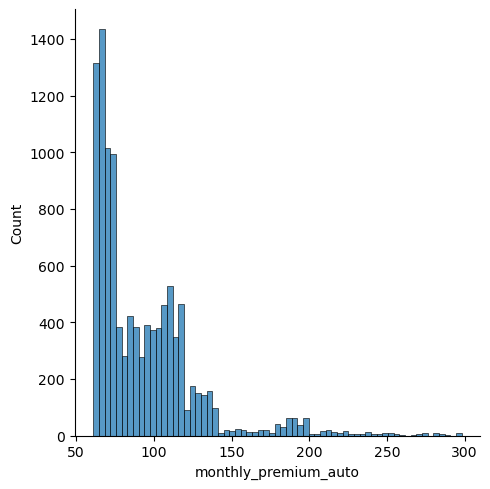

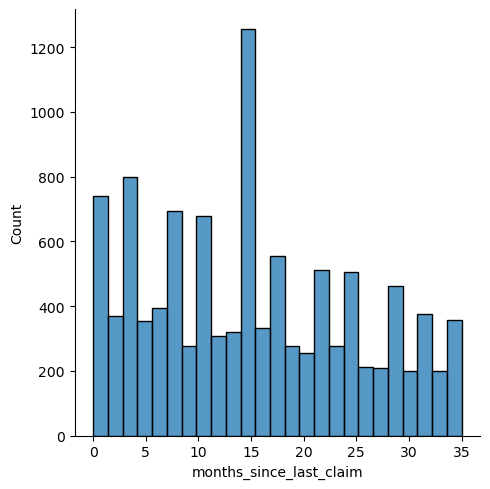

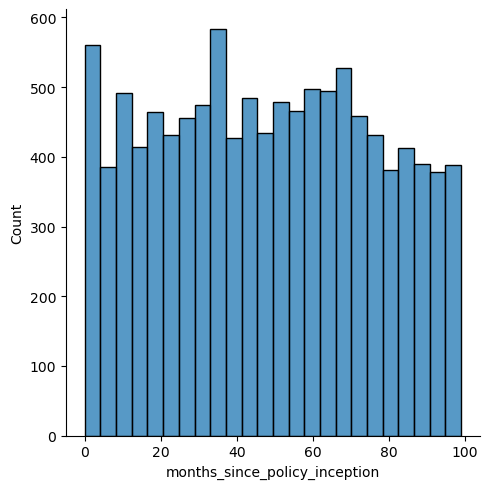

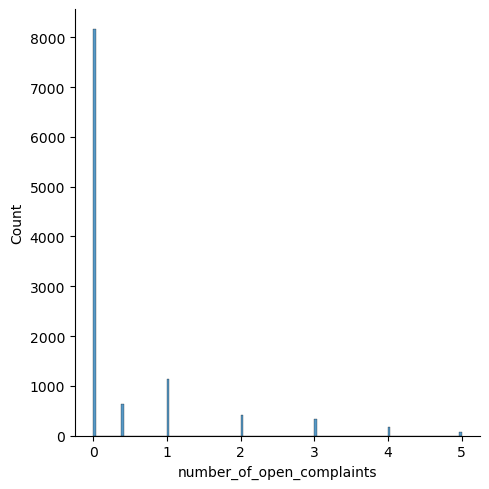

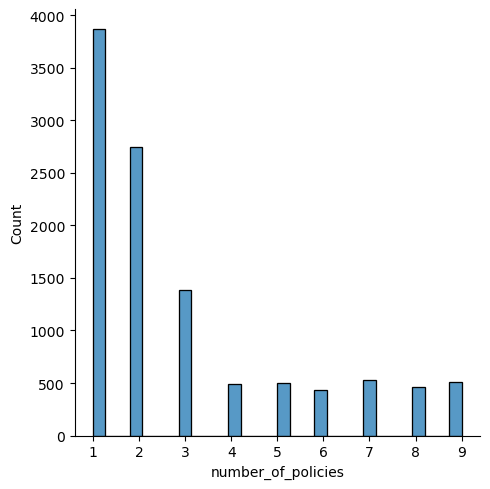

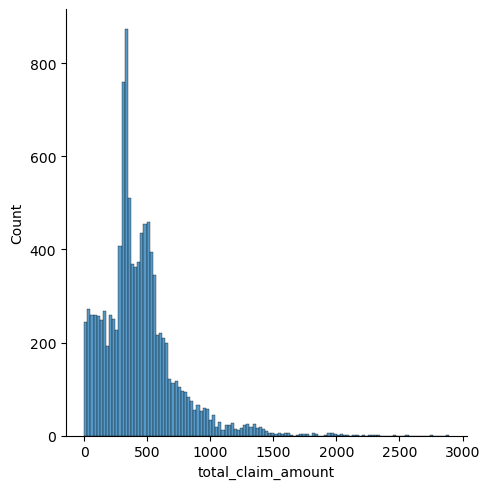

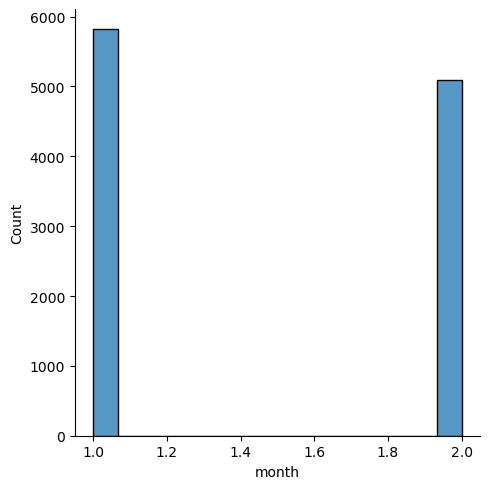

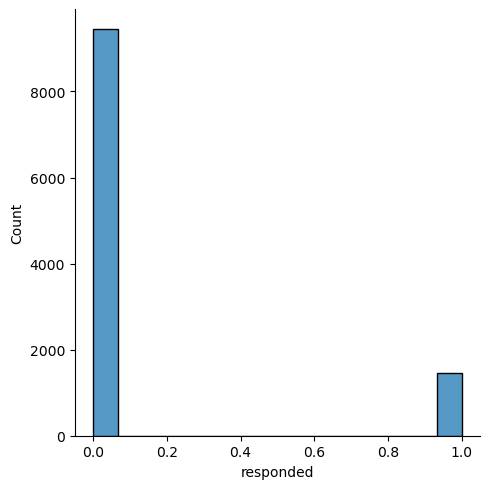

In [141]:
for x in numerical:
        sns.displot(numerical[x])
        plt.show()

## Use Matplotlib to construct histograms

customer_lifetime_value


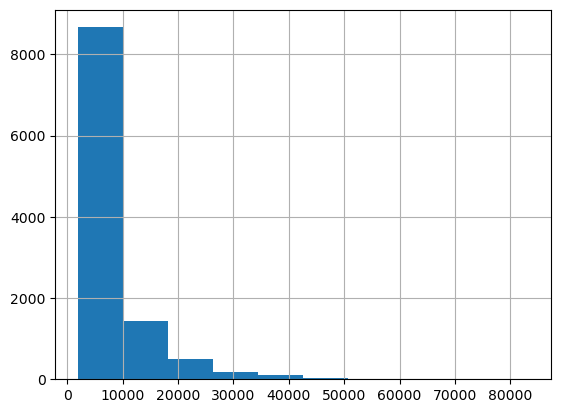

income


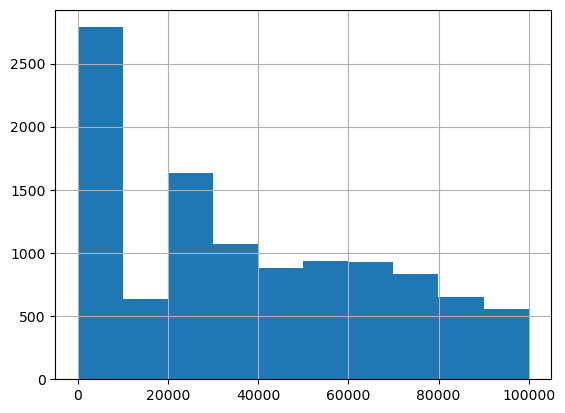

monthly_premium_auto


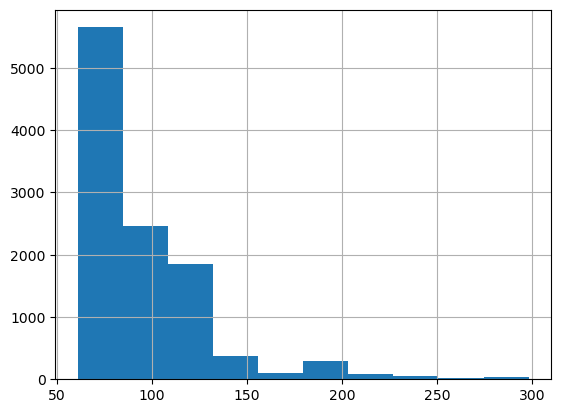

months_since_last_claim


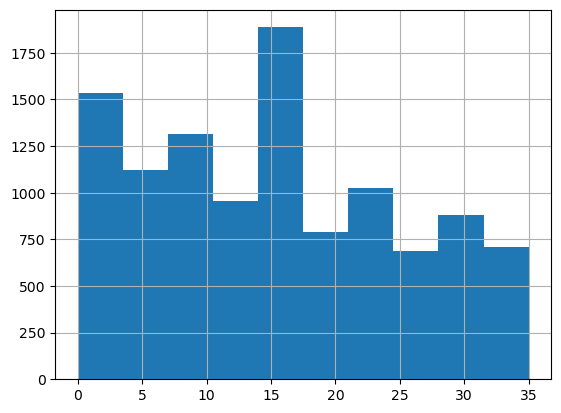

months_since_policy_inception


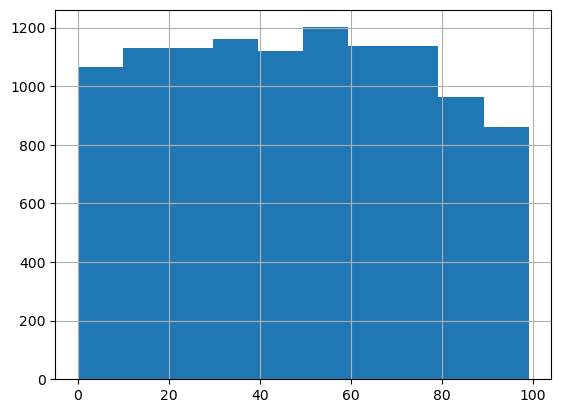

number_of_open_complaints


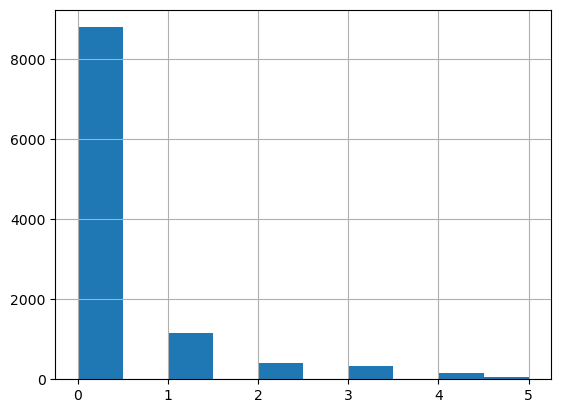

number_of_policies


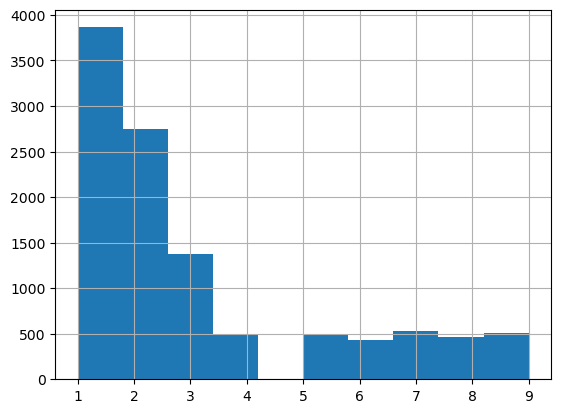

total_claim_amount


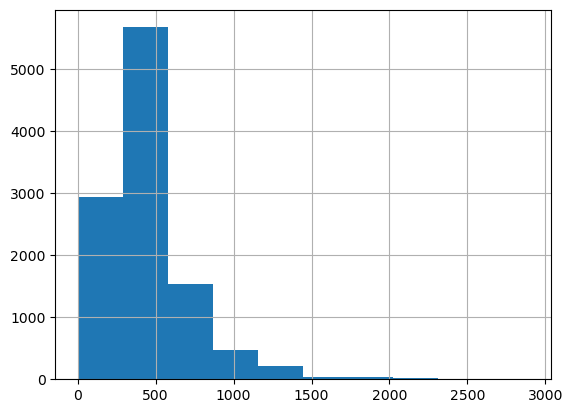

month


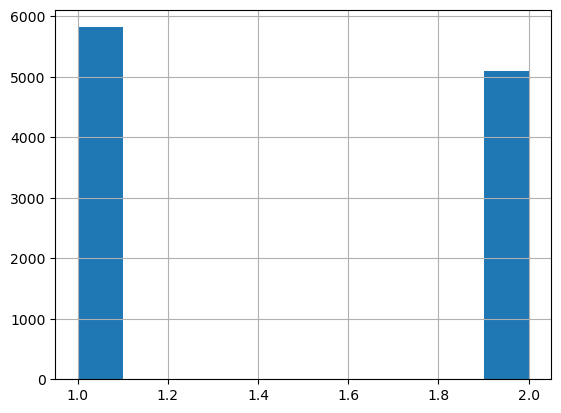

responded


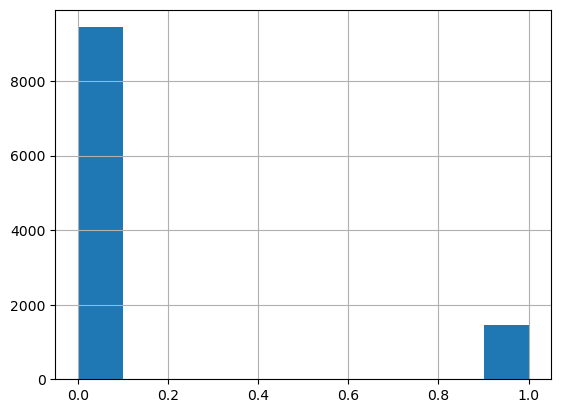

In [142]:
for x in numerical:
        print(x)
        numerical[x].hist()
        plt.show()

## Do the distributions for different numerical variables look like a normal distribution

They don't. We cannot see a symmetric pattern

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

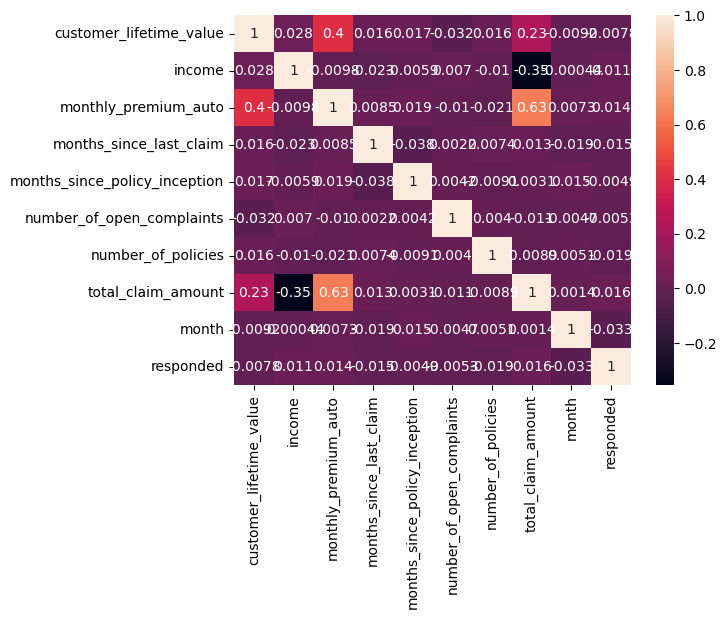

In [143]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

Nothing to drop as it seems there is no strong correlation.

# ROUND 5

## X-y split.

In [144]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,responded
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,0
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,0
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,0
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,0
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,0
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,0
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,0


In [146]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = marketing_customer_data['total_claim_amount']
X = marketing_customer_data.drop(['total_claim_amount', 'customer'], axis=1)

categorical = X.select_dtypes(object)
numerical = X.select_dtypes('number')

In [147]:
list(X.columns)

['state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month',
 'responded']

## Normalize (numerical).

In [148]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'month',
       'responded'],
      dtype='object')

# ROUND 6

## One Hot/Label Encoding (categorical).

### Dropping the following columns because non essentials for creating the model

In [149]:
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [150]:
# JUST DO ONE HOT LABEL ENCODING FOR NOW - Later split it
from sklearn.preprocessing import OneHotEncoder

# Step 1. 
#We need to train the encoder with a command to create dummy variables
encoder = OneHotEncoder(drop='first').fit(categorical)

#2. Show the new categories
print(encoder.categories_)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

In [151]:
# 3. Change the variable into an array
encoded = encoder.transform(categorical).toarray()
print(encoded)

# 4. Create cols
# cols = [colname for colname in row, encoder.c]
cols=[]
for row in encoder.categories_:
    for colname in row:
        cols.append(colname)
cols

# 5. Add names to the features again
cols = encoder.get_feature_names(input_features=categorical.columns)
cols

# 6. Let's see if it worked
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head(2)

[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Normalize numerical values

In [152]:
# Exercise 2 - Normalize the data
from sklearn.preprocessing import MinMaxScaler

# 1. Create a function 
transformer = MinMaxScaler().fit(numerical) #it will squize in the numbers between the min and max and uniformlly seperate it
# 2. Output are the scaled values
X_normalized = transformer.transform(numerical) #It is a dataframe but will be turned into an array
print(X_normalized.shape)

X_normalized

#Rename it because I change the dataset from an array into a Dataframe
normalized_data = pd.DataFrame(X_normalized, columns=numerical.columns) #correlation matrix for normlized features

(10910, 9)


## Concat DataFrames

In [153]:
X = pd.concat([normalized_data, onehot_encoded], axis=1)

## Linear Regression

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [156]:
from sklearn.metrics import r2_score

predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7709511670259861

## Apply linear regression.

In [157]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.769025438337113

## Model Validation

### R2

In [158]:
from sklearn.metrics import mean_absolute_error, r2_score

r2 = r2_score(y_test, predictions_test)
r2

0.769025438337113

In [162]:
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.7709511670259861 -- test R2: 0.769025438337113


### MSE

In [159]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,predictions_test)
mse

18649.573236458364

In [163]:
train_mse=mean_squared_error(lm.predict(X_train), y_train)
test_mse=mean_squared_error(lm.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 19816.41939590952 -- test MSE: 18649.573236458364


### RMSE

In [160]:
import math

rmse = math.sqrt(mse)
print(rmse)

136.5634403361982


In [164]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 140.7708044869728 -- test RMSE: 136.5634403361982


### MAE

In [161]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

95.26451651468794


In [165]:
train_mae=mean_absolute_error(lm.predict(X_train), y_train)
test_mae=mean_absolute_error(lm.predict(X_test), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 19816.41939590952 -- test MAE: 18649.573236458364


# ROUND 7